In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")
#should plot the expected results of a circuit, given the quantum circuit object
def plotBloch(circ):
    state = Statevector.from_instruction(circ)
    return plot_bloch_multivector(state)

#should plot the results from a job, given the result object from the job
def plotResultBloch(result):
    statevector = result.get_statevector()
    print(statevector)
    print("\n")
    print(type(statevector))
    return plot_bloch_multivector(statevector)

# statevector gives a density matrix, we need to find a way to extract a specific Bloch vector




# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

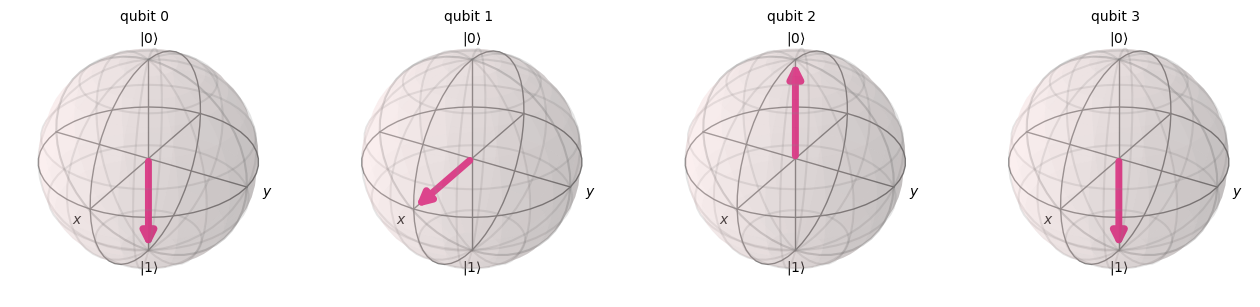

In [2]:
from qiskit.visualization import plot_bloch_multivector
qc = QuantumCircuit(4)
qc.h(1)
qc.x(0)
qc.y(3)
qc.z(2)
plotRet = plotBloch(qc)
plotRet


[0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         4.32978028e-17+0.70710678j
 0.00000000e+00+0.j         4.32978028e-17+0.70710678j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j        ]


<class 'numpy.ndarray'>


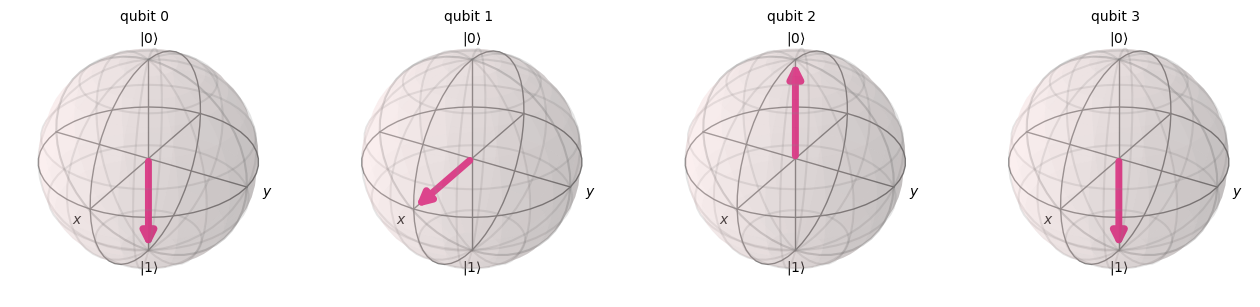

In [3]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_bloch_multivector
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
plot2 = plotResultBloch(job)
plot2

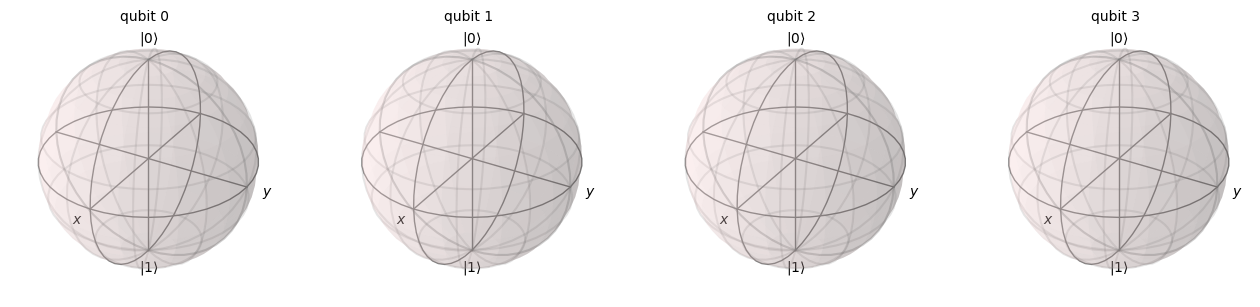

In [4]:
import numpy as np
from qiskit.visualization import plot_bloch_vector
statevector = job.get_statevector()
state = Statevector.from_instruction(qc)
test = state-statevector
plot_bloch_multivector(test)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['h', 'cx']
  All-qubits errors: ['h', 'cx']

Total count for the circuit is:  {'001': 25, '100': 25, '110': 17, '101': 49, '000': 417, '010': 47, '011': 23, '111': 421}

Total count for the circuit is:  {'111': 518, '000': 482}


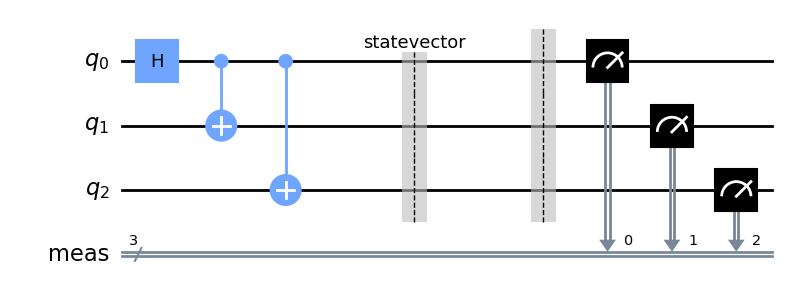

In [5]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error
import qiskit_aer.noise as noise
import numpy as np
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, DensityMatrix
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()
from qiskit import QuantumCircuit, execute, Aer, IBMQ

p_error = 0.05
p_reset = 0
p_meas = 0
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
bit_flip2 = bit_flip.tensor(bit_flip)
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])

# Build the noise model by adding the errors
noise_modelM = NoiseModel()
noise_modelM.add_all_qubit_quantum_error(error_reset, "reset")
noise_modelM.add_all_qubit_quantum_error(error_meas, "measure")
noise_modelM.add_all_qubit_quantum_error(bit_flip, ['h'])
noise_modelM.add_all_qubit_quantum_error(bit_flip2, ['cx'])
print(noise_modelM)
#noise_model.add_quantum_error(noise_ops2, ['cx'], [0,2])
# Create a circuit with a register of three qubits
circ = QuantumCircuit(3)
testCirc = QuantumCircuit(3)
theta = 0
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
testCirc.h(0)
# A CX (CNOT) gate on control qubit 0 and target qubit 1 generating a Bell state, followed by a CX gate targetting 0 and 2 to create the GHZ state.
circ.cx(0,1)
testCirc.cx(0,1)
circ.cx(0,2)
testCirc.cx(0,2)
circ.save_statevector()
circ.measure_all()
rho1 = DensityMatrix(testCirc)

simulator = Aer.get_backend('aer_simulator_statevector')
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_modelM)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)
testcirc_tnoise = transpile(testCirc, sim_noise)
rho2 = DensityMatrix(testcirc_tnoise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)
print("\nTotal count for the circuit is: ",result_bit_flip.get_counts(0))

#Noiseless job
job = execute(circ, simulator, shots=1000)

   
# Grab results from the job
result = job.result()
counts = result.get_counts(circ)
print("\nTotal count for the circuit is: ",counts)

# Draw the circuit
hist1 = plot_histogram(result_bit_flip.get_counts(0))
hist2 = plot_histogram(counts)
#circ.draw('mpl')
circ_tnoise.draw('mpl')

In [6]:
#We can get the trace distance by aproximating the density matrix by using the counts to create the wave function.
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector, DensityMatrix
def traceDistance(counts_bit_flip, rho1,n):
    total = 0
    for x in counts_bit_flip:
        string = '\''+x+'\''
        print(counts_bit_flip.get(x))
        total = total + counts_bit_flip.get(x)
    print(total)
    probs = {}
    for x in counts_bit_flip:
        probs[x] = counts_bit_flip.get(x)/total
    print(probs)
    Zero = Operator([[1],[0]])
    One = Operator([[0],[1]])
    bits = [Zero, One]
    nBits = []
    def tensorAllQubits(nBits,bits, n):
        tempBits = []

        if len(nBits) == 0:
            for bit in bits:
                nBits.append(bit)
        else:
            for matrix in nBits:
                for bit in bits:
                    temp=matrix.tensor(bit)
                    tempBits.append(temp)
            nBits = tempBits
        if n-1 != 0:
            return tensorAllQubits(nBits,bits,n-1)
        else:
            nBits = nBits
            return nBits

    nBits = tensorAllQubits(nBits,bits,n)
    #Note states are output in "binary order" i.e. 000 then 001 then 010, this can be used to create a dictionary to set the probabilites
    states = {}
    for x in range(len(nBits)):
        string = '{:0'+str(n)+'b}'
        states[string.format(x)] = nBits[x]

    waveFunc = 0
    for x in states:
        waveFunc = waveFunc + states[x]*probs[x]
    print(waveFunc)
    waveT = waveFunc.transpose()
    print(waveT)
    dens = waveT.compose(waveFunc)
    print(dens)
    #Now we find the like dictionary terms and add them together to create the wave function, which we then use to get the density matrix
    d1 = rho1-dens
    traceDist = d1.trace()/2
    print(traceDist)

In [7]:
traceDistance(counts_bit_flip, rho1, 3)

25
25
17
49
417
47
23
421
1024
{'001': 0.0244140625, '100': 0.0244140625, '110': 0.0166015625, '101': 0.0478515625, '000': 0.4072265625, '010': 0.0458984375, '011': 0.0224609375, '111': 0.4111328125}
Operator([[0.40722656+0.j],
          [0.02441406+0.j],
          [0.04589844+0.j],
          [0.02246094+0.j],
          [0.02441406+0.j],
          [0.04785156+0.j],
          [0.01660156+0.j],
          [0.41113281+0.j]],
         input_dims=(), output_dims=(2, 2, 2))
Operator([[0.40722656+0.j, 0.02441406+0.j, 0.04589844+0.j, 0.02246094+0.j,
           0.02441406+0.j, 0.04785156+0.j, 0.01660156+0.j, 0.41113281+0.j]],
         input_dims=(2, 2, 2), output_dims=())
Operator([[0.16583347+0.j, 0.00994205+0.j, 0.01869106+0.j, 0.00914669+0.j,
           0.00994205+0.j, 0.01948643+0.j, 0.0067606 +0.j, 0.1674242 +0.j],
          [0.00994205+0.j, 0.00059605+0.j, 0.00112057+0.j, 0.00054836+0.j,
           0.00059605+0.j, 0.00116825+0.j, 0.00040531+0.j, 0.01003742+0.j],
          [0.01869106+0.j, 